In [76]:
import time
notebookstart= time.time()

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
# Models Packages
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn import preprocessing
from contextlib import contextmanager
import keras as ks
from keras import backend as K
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer as Tfidf
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
# Tf-Idf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from scipy.sparse import hstack, csr_matrix
from nltk.corpus import stopwords 
from scipy.cluster.vq import kmeans2, whiten
from sklearn.decomposition import PCA
# Viz

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.layers import Input, Dropout, Dense, Embedding, SpatialDropout1D, concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from numpy.random import seed
seed(666)
from tensorflow import set_random_seed
set_random_seed(666)

@contextmanager
def timer(name):
    t0 = time.time()
    yield
    print('[{' + name + '}] done in {' + str(round(time.time() - t0, 3)) + '} s')
    


Using TensorFlow backend.


In [77]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR, SVR
from sklearn.metrics import mean_absolute_error
pd.options.display.precision = 15

import lightgbm as lgb
import xgboost as xgb
import time
import datetime
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
from sklearn import metrics
from sklearn import linear_model
import gc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from IPython.display import HTML
import json
import altair as alt

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
train = reduce_mem_usage(pd.read_csv('input/train.csv.zip'))
test = reduce_mem_usage(pd.read_csv('input/test.csv.zip'))
mulliken = reduce_mem_usage(pd.read_csv('input/mulliken_charges.csv.zip'))
dipole = reduce_mem_usage(pd.read_csv('input/dipole_moments.csv.zip'))
structure = reduce_mem_usage(pd.read_csv('input/structures.csv.zip'))
potential = reduce_mem_usage(pd.read_csv('input/potential_energy.csv.zip'))
magnetic = reduce_mem_usage(pd.read_csv('input/magnetic_shielding_tensors.csv.zip'))
scaler = reduce_mem_usage(pd.read_csv('input/scalar_coupling_contributions.csv.zip'))
sub = reduce_mem_usage(pd.read_csv('input/sample_submission.csv.zip'))


Mem. usage decreased to 106.62 Mb (50.0% reduction)
Mem. usage decreased to 52.57 Mb (45.0% reduction)
Mem. usage decreased to 16.09 Mb (54.2% reduction)
Mem. usage decreased to  1.13 Mb (56.2% reduction)
Mem. usage decreased to 51.74 Mb (52.1% reduction)
Mem. usage decreased to  0.81 Mb (37.5% reduction)
Mem. usage decreased to 39.49 Mb (69.3% reduction)
Mem. usage decreased to 115.50 Mb (59.4% reduction)
Mem. usage decreased to 11.95 Mb (68.7% reduction)


In [4]:
train.head(10)

id     molecule_name  atom_index_0  atom_index_1  type  \
0   0  dsgdb9nsd_000001             1             0  1JHC   
1   1  dsgdb9nsd_000001             1             2  2JHH   
2   2  dsgdb9nsd_000001             1             3  2JHH   
3   3  dsgdb9nsd_000001             1             4  2JHH   
4   4  dsgdb9nsd_000001             2             0  1JHC   
5   5  dsgdb9nsd_000001             2             3  2JHH   
6   6  dsgdb9nsd_000001             2             4  2JHH   
7   7  dsgdb9nsd_000001             3             0  1JHC   
8   8  dsgdb9nsd_000001             3             4  2JHH   
9   9  dsgdb9nsd_000001             4             0  1JHC   

   scalar_coupling_constant  
0                84.8125000  
1               -11.2578125  
2               -11.2578125  
3               -11.2578125  
4                84.8125000  
5               -11.2578125  
6               -11.2578125  
7                84.8125000  
8               -11.2578125  
9                84.8125000

In [5]:
structure.head(10)

molecule_name  atom_index atom                  x                  y  \
0  dsgdb9nsd_000001           0    C -0.012695312500000  1.085937500000000   
1  dsgdb9nsd_000001           1    H  0.002149581909180 -0.006031036376953   
2  dsgdb9nsd_000001           2    H  1.011718750000000  1.463867187500000   
3  dsgdb9nsd_000001           3    H -0.541015625000000  1.447265625000000   
4  dsgdb9nsd_000001           4    H -0.523925781250000  1.437500000000000   
5  dsgdb9nsd_000002           0    N -0.040435791015625  1.024414062500000   
6  dsgdb9nsd_000002           1    H  0.017257690429688  0.012542724609375   
7  dsgdb9nsd_000002           2    H  0.916015625000000  1.358398437500000   
8  dsgdb9nsd_000002           3    H -0.520507812500000  1.343750000000000   
9  dsgdb9nsd_000003           0    O -0.034362792968750  0.977539062500000   

                   z  
0  0.008003234863281  
1  0.001976013183594  
2  0.000276565551758  
3 -0.876464843750000  
4  0.906250000000000  
5  0.062561035156250  
6 -0.027374267578125  
7 -0.028762817382812  
8 -0.775390625000000  
9  0.007602691650391

In [6]:
magnetic.shape

(1533537, 11)

In [7]:
potential.head()

molecule_name  potential_energy
0  dsgdb9nsd_000001         -40.53125
1  dsgdb9nsd_000002         -56.56250
2  dsgdb9nsd_000003         -76.43750
3  dsgdb9nsd_000005         -93.43750
4  dsgdb9nsd_000007         -79.81250

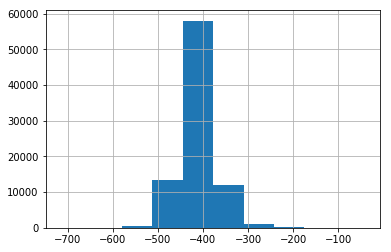

In [8]:
potential.potential_energy.hist()

In [9]:
magnetic.head()

molecule_name  atom_index          XX            YX                 ZX  \
0  dsgdb9nsd_000001           0  195.375000  0.0000000000 -0.000100016593933   
1  dsgdb9nsd_000001           1   31.343750 -1.2314453125  4.054687500000000   
2  dsgdb9nsd_000001           2   31.578125  1.2177734375 -4.148437500000000   
3  dsgdb9nsd_000001           3   31.515625  4.1093750000  1.272460937500000   
4  dsgdb9nsd_000001           4   31.406250 -4.0937500000 -1.179687500000000   

             XY          YY                 ZY                 XZ  \
0  0.0000000000  195.375000  0.000699996948242 -0.000100016593933   
1 -1.2314453125   28.953125 -1.717773437500000  4.054687500000000   
2  1.2177734375   28.906250 -1.603515625000000 -4.148437500000000   
3  4.1093750000   33.906250  1.695312500000000  1.272460937500000   
4 -4.0937500000   34.062500  1.625976562500000 -1.179687500000000   

                  YZ          ZZ  
0  0.000699996948242  195.375000  
1 -1.717773437500000   34.093750  
2 -1.603515625000000   33.906250  
3  1.695312500000000   28.953125  
4  1.625976562500000   28.906250

In [10]:
train = pd.merge(train, scaler, how = 'left',
                  left_on  = ['molecule_name', 'atom_index_0', 'atom_index_1', 'type'],
                  right_on = ['molecule_name', 'atom_index_0', 'atom_index_1', 'type'])

In [11]:
y = train['scalar_coupling_constant']# - train['fc']

In [12]:
train = reduce_mem_usage(pd.read_csv('train_0.csv', index_col=0))
test = reduce_mem_usage(pd.read_csv('test_0.csv', index_col=0))

Mem. usage decreased to 746.32 Mb (75.0% reduction)
Mem. usage decreased to 391.87 Mb (75.6% reduction)


In [13]:
train_1 = reduce_mem_usage(pd.read_csv('train_1.csv', index_col=0))
test_1 = reduce_mem_usage(pd.read_csv('test_1.csv', index_col=0))

Mem. usage decreased to 315.41 Mb (73.1% reduction)
Mem. usage decreased to 169.65 Mb (73.1% reduction)


In [14]:
fs0 = [f for f in train_1.columns if f not in train.columns]
fs0

['c_x',
 'c_y',
 'c_z',
 'x_closest_0',
 'y_closest_0',
 'z_closest_0',
 'x_closest_1',
 'y_closest_1',
 'z_closest_1',
 'distance',
 'distance_center0',
 'distance_center1',
 'distance_c0',
 'distance_c1',
 'distance_f0',
 'distance_f1',
 'cos_c0_c1',
 'cos_f0_f1',
 'cos_center0_center1',
 'cos_c0',
 'cos_c1',
 'cos_f0',
 'cos_f1',
 'cos_center0',
 'cos_center1',
 'atom_n']

In [15]:
train_3 = reduce_mem_usage(pd.read_csv('input/train_giba.csv', index_col=None))
test_3 = reduce_mem_usage(pd.read_csv('input/test_giba.csv', index_col=None))

Mem. usage decreased to 910.68 Mb (71.8% reduction)
Mem. usage decreased to 501.79 Mb (71.2% reduction)


In [16]:
fs1 = [f for f in train_3.columns if f not in (train.columns.tolist() + fs0)]
fs1

['molecule_name',
 'id',
 'scalar_coupling_constant',
 'ID',
 'structure_atom_0',
 'structure_x_0',
 'structure_y_0',
 'structure_z_0',
 'structure_atom_1',
 'structure_x_1',
 'structure_y_1',
 'structure_z_1',
 'typei',
 'N1',
 'N2',
 'link0',
 'link1',
 'linkN',
 'dist_xyz',
 'inv_dist0',
 'inv_dist1',
 'inv_distP',
 'R0',
 'R1',
 'E0',
 'E1',
 'inv_dist0R',
 'inv_dist1R',
 'inv_distPR',
 'inv_dist0E',
 'inv_dist1E',
 'inv_distPE',
 'linkM0',
 'linkM1',
 'min_molecule_atom_0_dist_xyz',
 'mean_molecule_atom_0_dist_xyz',
 'max_molecule_atom_0_dist_xyz',
 'sd_molecule_atom_0_dist_xyz',
 'min_molecule_atom_1_dist_xyz',
 'mean_molecule_atom_1_dist_xyz',
 'max_molecule_atom_1_dist_xyz',
 'sd_molecule_atom_1_dist_xyz',
 'molecule_name.1',
 'atom_index_1.1',
 'coulomb_C.x',
 'coulomb_F.x',
 'coulomb_H.x',
 'coulomb_N.x',
 'coulomb_O.x',
 'yukawa_C.x',
 'yukawa_F.x',
 'yukawa_H.x',
 'yukawa_N.x',
 'yukawa_O.x',
 'coulomb_C.y',
 'coulomb_F.y',
 'coulomb_H.y',
 'coulomb_N.y',
 'coulomb_O.y',
 '

In [17]:
train = pd.concat([train, train_1[fs0], train_3[fs1]], axis=1)
test = pd.concat([test, test_1[fs0], test_3[fs1]], axis=1)


In [18]:
train_type = pd.read_csv('input/train.csv.zip', usecols=['molecule_name', 'atom_index_0', 'atom_index_1', 'type'])
test_type = pd.read_csv('input/test.csv.zip', usecols=['molecule_name', 'atom_index_0', 'atom_index_1', 'type'])

train['type'] = train_type.type
test['type'] = test_type.type

train['molecule_name'] = train_type.molecule_name
test['molecule_name'] = test_type.molecule_name


In [19]:
train['atom_index_0'] = train_type.atom_index_0
test['atom_index_0'] = test_type.atom_index_0

train['atom_index_1'] = train_type.atom_index_1
test['atom_index_1'] = test_type.atom_index_1


In [20]:
train = pd.merge(train, scaler, how = 'left',
                  left_on  = ['molecule_name', 'atom_index_0', 'atom_index_1', 'type'],
                  right_on = ['molecule_name', 'atom_index_0', 'atom_index_1', 'type'])

In [21]:
train_babel_feat = pd.read_csv('input/train_ob_charges.csv')
test_babel_feat = pd.read_csv('input/test_ob_charges.csv')


In [22]:
train_babel_feat.shape

(1533537, 15)

In [23]:
train_babel_feat['atom_index_0'] = train_babel_feat.atom_index
train_babel_feat['atom_index_1'] = train_babel_feat.atom_index

test_babel_feat['atom_index_0'] = test_babel_feat.atom_index
test_babel_feat['atom_index_1'] = test_babel_feat.atom_index


In [24]:
bfs =  ['molecule_name', 'atom_index_0'] + ['eem', 'qtpie']

In [25]:
train = train.merge(train_babel_feat[bfs], how = 'left', 
                 on=['molecule_name', 'atom_index_0'])

bfs =  ['molecule_name', 'atom_index_1'] + ['eem', 'qtpie']
train = train.merge(train_babel_feat[bfs], how = 'left', 
                 on=['molecule_name', 'atom_index_1'])

In [26]:

bfs =  ['molecule_name', 'atom_index_0'] + ['eem', 'qtpie']
test = test.merge(test_babel_feat[bfs], how = 'left', 
                 on=['molecule_name', 'atom_index_0'])


In [27]:
bfs =  ['molecule_name', 'atom_index_1'] + ['eem', 'qtpie']
test = test.merge(test_babel_feat[bfs], how = 'left', 
                 on=['molecule_name', 'atom_index_1'])

In [28]:
train.head()

atom_index_0  atom_index_1  type  atom_index_x  atom_0               x_0  \
0             1             0  1JHC             1       0  0.00214958190918   
1             1             2  2JHH             1       0  0.00214958190918   
2             1             3  2JHH             1       0  0.00214958190918   
3             1             4  2JHH             1       0  0.00214958190918   
4             2             0  1JHC             2       0  1.01171875000000   

                 y_0                z_0        EN_x           rad_x  ...  NF  \
0 -0.006031036376953  0.001976013183594  2.19921875  0.429931640625  ... NaN   
1 -0.006031036376953  0.001976013183594  2.19921875  0.429931640625  ... NaN   
2 -0.006031036376953  0.001976013183594  2.19921875  0.429931640625  ... NaN   
3 -0.006031036376953  0.001976013183594  2.19921875  0.429931640625  ... NaN   
4  1.463867187500000  0.000276565551758  2.19921875  0.429931640625  ... NaN   

   NO        fc              sd           pso            dso  \
0 NaN  83.00000  0.254638671875  1.2587890625  0.27197265625   
1 NaN -11.03125  0.353027343750  2.8574218750 -3.43359375000   
2 NaN -11.03125  0.353027343750  2.8593750000 -3.43359375000   
3 NaN -11.03125  0.353027343750  2.8593750000 -3.43359375000   
4 NaN  83.00000  0.254638671875  1.2587890625  0.27197265625   

               eem_x            qtpie_x              eem_y            qtpie_y  
0  0.161131359327947  0.773439349698371 -0.644530825087479 -3.093806799641671  
1  0.161131359327947  0.773439349698371  0.161131811379221  0.773442481023162  
2  0.161131359327947  0.773439349698371  0.161133990721081  0.773463412039650  
3  0.161131359327947  0.773439349698371  0.161133663659230  0.773461556880489  
4  0.161131811379221  0.773442481023162 -0.644530825087479 -3.093806799641671  

[5 rows x 205 columns]

In [29]:
train['q_0'] = train['eem_x'] * train['eem_y'] / train['dist'] ** 2
test['q_0'] = test['eem_x'] * test['eem_y'] / test['dist'] ** 2

train['q_1'] = train['qtpie_x'] * train['qtpie_y'] / train['dist'] ** 2
test['q_1'] = test['qtpie_x'] * test['qtpie_y'] / test['dist'] ** 2

In [30]:
scaler.columns

Index(['molecule_name', 'atom_index_0', 'atom_index_1', 'type', 'fc', 'sd',
       'pso', 'dso'],
      dtype='object')

In [31]:
train_p_0 = train[['x_0', 'y_0', 'z_0']].values
train_p_1 = train[['x_1', 'y_1', 'z_1']].values
test_p_0 = test[['x_0', 'y_0', 'z_0']].values
test_p_1 = test[['x_1', 'y_1', 'z_1']].values

In [32]:
train['dist_0'] = np.linalg.norm(train_p_0 + train_p_1, axis=1)
test['dist_0'] = np.linalg.norm(test_p_0 + test_p_1, axis=1)

train['dist_1'] = np.max(train_p_0 * train_p_1, axis=1)
test['dist_1'] = np.max(test_p_0 * test_p_1, axis=1)

train['dist_2'] = np.min(train_p_0 * train_p_1, axis=1)
test['dist_2'] = np.min(test_p_0 * test_p_1, axis=1)

train['dist_3'] = np.var(train_p_0 * train_p_1, axis=1)
test['dist_3'] = np.var(test_p_0 * test_p_1, axis=1)

In [33]:
train['m_0'] = train.groupby(['molecule_name', 'atom_index_0'])['dist_2'].transform('max')
test['m_0'] = train.groupby(['molecule_name', 'atom_index_0'])['dist_2'].transform('max')

train['d_0'] = np.max(np.abs(train_p_0 - train_p_1), axis=1)
test['d_0'] = np.max(np.abs(test_p_0 - test_p_1), axis=1)


In [34]:
train_2 = reduce_mem_usage(pd.read_csv('input/train_2.csv', index_col=0))
test_2 = reduce_mem_usage(pd.read_csv('input/test_2.csv', index_col=0))

Mem. usage decreased to 524.20 Mb (78.0% reduction)
Mem. usage decreased to 281.96 Mb (78.0% reduction)


In [35]:
train_2.head()

id     molecule_name  atom_index_0  atom_index_1  type atom1 atom2  type0  \
0   0  dsgdb9nsd_000001             1             0  1JHC     H     C      0   
1   1  dsgdb9nsd_000001             1             2  2JHH     H     H      1   
2   2  dsgdb9nsd_000001             1             3  2JHH     H     H      1   
3   3  dsgdb9nsd_000001             1             4  2JHH     H     H      1   
4   4  dsgdb9nsd_000001             2             0  1JHC     H     C      0   

   type1  type2  ...  a1_nb_inring8  a1_nb_nb_h  a1_nb_nb_o  a1_nb_nb_c  \
0      0      0  ...              0           0           0           1   
1      0      0  ...              0           4           0           0   
2      0      0  ...              0           4           0           0   
3      0      0  ...              0           4           0           0   
4      0      0  ...              0           0           0           1   

   a1_nb_nb_n  a1_nb_nb_na        x_a1_nb    y_a1_nb            z_a1_nb  \
0           0            0 -0.52392578125  1.4375000  0.906250000000000   
1           0            0 -0.01269531250  1.0859375  0.008003234863281   
2           0            0 -0.01269531250  1.0859375  0.008003234863281   
3           0            0 -0.01269531250  1.0859375  0.008003234863281   
4           0            0 -0.52392578125  1.4375000  0.906250000000000   

   dist_to_type_mean  
0       0.9990234375  
1       1.0048828125  
2       1.0048828125  
3       1.0048828125  
4       0.9990234375  

[5 rows x 66 columns]

In [36]:
train_2.drop(labels=['atom_index_0', 'atom_index_1' ,'type' ,'atom1', 'atom2', 'id'], axis=1, inplace=True)
test_2.drop(labels=['atom_index_0', 'atom_index_1' ,'type' ,'atom1', 'atom2', 'id'], axis=1, inplace=True)

In [37]:
fs2 = [f for f in train_2.columns if f not in train.columns]
fs2

['type0',
 'type1',
 'type2',
 'type3',
 'x0',
 'y0',
 'z0',
 'x1',
 'y1',
 'z1',
 'a1_degree',
 'a1_hybridization',
 'a1_inring',
 'a1_inring3',
 'a1_inring4',
 'a1_inring5',
 'a1_inring6',
 'a1_inring7',
 'a1_inring8',
 'a1_nb_h',
 'a1_nb_o',
 'a1_nb_c',
 'a1_nb_n',
 'a1_nb_na',
 'a0_nb_degree',
 'a0_nb_hybridization',
 'a0_nb_inring',
 'a0_nb_inring3',
 'a0_nb_inring4',
 'a0_nb_inring5',
 'a0_nb_inring6',
 'a0_nb_inring7',
 'a0_nb_inring8',
 'a0_nb_nb_h',
 'a0_nb_nb_o',
 'a0_nb_nb_c',
 'a0_nb_nb_n',
 'a0_nb_nb_na',
 'x_a0_nb',
 'y_a0_nb',
 'z_a0_nb',
 'a1_nb_degree',
 'a1_nb_hybridization',
 'a1_nb_inring',
 'a1_nb_inring3',
 'a1_nb_inring4',
 'a1_nb_inring5',
 'a1_nb_inring6',
 'a1_nb_inring7',
 'a1_nb_inring8',
 'a1_nb_nb_h',
 'a1_nb_nb_o',
 'a1_nb_nb_c',
 'a1_nb_nb_n',
 'a1_nb_nb_na',
 'x_a1_nb',
 'y_a1_nb',
 'z_a1_nb',
 'dist_to_type_mean']

In [38]:
train = pd.concat([train, train_2[fs2]], axis=1)
test = pd.concat([test, test_2[fs2]], axis=1)


In [39]:
np.unique(train['type'])

array(['1JHC', '1JHN', '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN'],
      dtype=object)

In [40]:
del train_1, train_2
del test_1, test_2

gc.collect()

126

In [41]:
feature_files = os.listdir('oofs/')

train_files = sorted(filter(lambda x: 'validation_' in x, feature_files))
test_files = sorted(filter(lambda x: 'test_' in x, feature_files))

list(test_files)


['test_lgbm_dso_v0.2.3.csv',
 'test_lgbm_fc_v0.2.3.csv',
 'test_lgbm_kp_v0.1.0.csv',
 'test_lgbm_pso_v0.2.3.csv',
 'test_lgbm_sd_v0.2.3.csv',
 'test_lgbm_v0.1.0.csv',
 'test_lgbm_v0.1.2.csv',
 'test_lgbm_v0.1.3.csv',
 'test_lgbm_v0.1.7.csv',
 'test_lgbm_v0.2.2.csv',
 'test_lgbm_v0.2.4.csv',
 'test_lgbm_v0.2.5.csv',
 'test_lgbm_v0.2.7.csv',
 'test_lgbm_v0.3.0.csv',
 'test_lgbm_v0.3.1.csv',
 'test_lgbm_v0.3.2.csv',
 'test_lgbm_v0.3.4.csv',
 'test_lgbm_v0.3.5.csv',
 'test_lgbm_v0.3.6-0.csv',
 'test_lgbm_v0.3.6.csv',
 'test_lgbm_v0.3.7.csv',
 'test_lgbm_v0.3.8.csv',
 'test_nn_kp_scalar_v0.1.0.csv',
 'test_nn_kp_scalar_v0.1.2.csv',
 'test_nn_kp_v0.1.0.csv',
 'test_nn_v0.1.0.csv',
 'test_nn_v0.1.1.csv',
 'test_nn_v0.1.4.csv',
 'test_nnx_v0.1.3.csv']

In [42]:
train_stacked = pd.concat([pd.read_csv('oofs/' + file, index_col=None, header=0) for file in train_files], axis=1)
test_stacked = pd.concat([pd.read_csv('oofs/' + file, index_col=None, header=0) for file in test_files], axis=1)


train_stacked.columns = ['y_' + str(i) for i, f in enumerate(train_stacked.columns)]
test_stacked.columns = ['y_' + str(i) for i, f in enumerate(test_stacked.columns)]



In [43]:
train = pd.concat([train, train_stacked], axis=1)
test = pd.concat([test, test_stacked], axis=1)


In [44]:
def metric(df, preds):
    df["prediction"] = preds
    maes = []
    for t in df.type.unique():
        y_true = df[df.type==t].scalar_coupling_constant.values
        y_pred = df[df.type==t].prediction.values
        mae = np.log(metrics.mean_absolute_error(y_true, y_pred))
        maes.append(mae)
    return np.mean(maes)
#df for evaluate
eval_df = pd.DataFrame({"type": train["type"]})
eval_df["scalar_coupling_constant"] = y

In [45]:
train.head()

atom_index_0  atom_index_1  type  atom_index_x  atom_0               x_0  \
0             1             0  1JHC             1       0  0.00214958190918   
1             1             2  2JHH             1       0  0.00214958190918   
2             1             3  2JHH             1       0  0.00214958190918   
3             1             4  2JHH             1       0  0.00214958190918   
4             2             0  1JHC             2       0  1.01171875000000   

                 y_0                z_0        EN_x           rad_x  ...  \
0 -0.006031036376953  0.001976013183594  2.19921875  0.429931640625  ...   
1 -0.006031036376953  0.001976013183594  2.19921875  0.429931640625  ...   
2 -0.006031036376953  0.001976013183594  2.19921875  0.429931640625  ...   
3 -0.006031036376953  0.001976013183594  2.19921875  0.429931640625  ...   
4  1.463867187500000  0.000276565551758  2.19921875  0.429931640625  ...   

                 y_19                y_20               y_21  \
0  84.627708559975247  83.811715073486482  1.812452508202724   
1 -10.710855744125915 -11.171884328693274 -0.185925043456509   
2 -10.965373717392671 -11.360466749648435 -0.177334674107531   
3 -11.019687684801657 -11.141179785176174 -0.229670780491647   
4  84.878617762302852  84.681010432965522  1.809981424814868   

                 y_22                 y_23                 y_24  \
0  95.048549730648389  103.258251944079646  112.917228698730483   
1 -11.589163089548938  -11.107584216784216  -11.230779647827148   
2 -11.133968153857463  -10.989346685628341  -12.033445358276367   
3 -11.194055309663836   -9.619963984126805  -10.072475433349609   
4  86.577416462750222   88.355711104643376   84.729064941406250   

                 y_25                y_26                y_27  \
0  82.727394104003906  98.973091125488281  91.391456604003906   
1  -9.030854225158693  -9.886816024780273 -10.757715225219727   
2  -9.451404571533203  -9.344213485717773 -11.066827774047852   
3 -10.395615577697754 -10.105822563171387 -11.060810089111328   
4  83.548324584960938  99.920852661132798  86.487365722656250   

                  y_28  
0  105.926689147949219  
1  -10.777632713317873  
2  -11.302467346191404  
3   -9.890068054199221  
4   93.019058227539062  

[5 rows x 301 columns]

In [50]:
train = train_stacked
test = test_stacked

In [55]:

train['molecule_name'] = train_3.molecule_name
test['molecule_name'] = test_3.molecule_name


train['type'] = train_3.type
test['type'] = test_3.type


In [56]:
train.shape

(4658147, 31)

In [57]:
# for f in ['structure_atom_0', 'structure_atom_1', 'molecule_name.1']:
#     train[f] = train[f].astype('category')
#     test[f] = test[f].astype('category')

In [58]:
from catboost import Pool, CatBoostClassifier, CatBoostRegressor



In [84]:
oof = np.zeros(len(train))
predictions = np.zeros(len(test))
n_split = 5
kf = KFold(n_splits=n_split, random_state=666, shuffle=True)
    
for type_ in np.unique(train['type']):

    
    train_ = train[train['type'] == type_].replace([np.inf, -np.inf], np.nan).fillna(0)
    test_ = test[test['type'] == type_].replace([np.inf, -np.inf], np.nan).fillna(0)
    
    train_index = train_.index
    test_index = test_.index
    
    y_ = y[train['type'] == type_]
    
    features = [c for c in train_.columns if c not in ['id', 'molecule_name', 'x_0', 'y_0', 'z_0',
                                                       'x_1', 'y_1', 'z_1', 'atom_index', 'atom_index_0',
                                                       'atom_index_1', 'atom_index_x', 'atom_index_y',
                                                       'type', 'scalar_coupling_constant',
                                                       'atom_0', 'atom_1', 'fc' 'sd' 'pso' 'dso']]
    scaler = StandardScaler()
    scaler.fit(pd.concat([train_[features], test_[features]]))
    x_tr = pd.DataFrame(scaler.transform(train_[features]))
    x_te = pd.DataFrame(scaler.transform(test_[features]))
    
    early_stopping = EarlyStopping(monitor='val_mean_absolute_error', patience=3, verbose=0, mode='min')
    mcp_save = ModelCheckpoint('best_model.hdf5', save_best_only=True, monitor='val_mean_absolute_error', mode='min')
    reduce_lr_loss = ReduceLROnPlateau(monitor='val_mean_absolute_error', factor=0.1, patience=2, verbose=1, epsilon=1e-4, mode='min')

    
    
    for i, (train_idx, valid_idx) in enumerate(kf.split(train_)):  
        print(f'Fold {i + 1}')
        x_train = x_tr
        y_train = y_
        
        config = tf.ConfigProto(intra_op_parallelism_threads=3,
                            use_per_session_threads=3, inter_op_parallelism_threads=3)
        with tf.Session(graph=tf.Graph(), config=config) as sess, timer('fit_predict'):
                ks.backend.set_session(sess)
                with tf.device('/gpu:0'):
                        model_in = ks.Input(shape=(x_train.shape[1],), dtype='float32', sparse=False)
                        out = ks.layers.Dense(1000, activation='relu', kernel_initializer=
                          ks.initializers.RandomNormal(mean=0.00, stddev=0.08, seed=666))(model_in)
                        out = ks.layers.BatchNormalization()(out)
                        out = ks.layers.Dropout(0.25)(out)
                        out = ks.layers.Dense(1000, activation='sigmoid', kernel_initializer=
                          ks.initializers.RandomNormal(mean=0.00, stddev=0.08, seed=666))(out)
                        out = ks.layers.BatchNormalization()(out)
                        out = ks.layers.Dropout(0.1)(out)
                        out = ks.layers.Dense(1000, activation='relu', kernel_initializer=
                          ks.initializers.RandomNormal(mean=0.00, stddev=0.08, seed=666))(out)
                        out = ks.layers.BatchNormalization()(out)
                        out = ks.layers.Dropout(0.1)(out)
                        out = ks.layers.Dense(1000, activation='relu', kernel_initializer=
                          ks.initializers.RandomNormal(mean=0.00, stddev=0.08, seed=666))(out)
                        out = ks.layers.BatchNormalization()(out)
                        out = ks.layers.Dropout(0.1)(out)
                        out =  ks.layers.Dense(1000, activation='relu', kernel_initializer=
                          ks.initializers.RandomNormal(mean=0.00, stddev=0.08, seed=666))(out)
                        out = ks.layers.Dense(1 , activation='linear', kernel_initializer=
                          ks.initializers.RandomNormal(mean=0.00, stddev=0.05, seed=666))(out)
                        model = ks.models.Model(model_in, out)
                        model.compile(loss='mean_squared_error',
                                      optimizer=ks.optimizers.Adam(lr=1e-3),
                                      metrics=['mean_absolute_error'])
                        batch_size = 2 ** 8
                        for i in range(2):
                            with timer('pass ' +  str(i + 1)):
                                model.fit(x=x_train.iloc[train_idx], y=y_train.iloc[train_idx], batch_size=batch_size+(batch_size*(2*i)), epochs=6, 
                                    validation_data=(x_train.iloc[valid_idx], y_train.iloc[valid_idx]), callbacks=[], shuffle=True)
        
                        #model = load_model('best_model.hdf5')
                        oof[train_index[valid_idx]] = model.predict(x_train.iloc[valid_idx]).reshape(1, -1)
                        predictions[test_index] += model.predict(x_te)[:, 0] / n_split

    
print("CV score: {:<8.5f}".format(metric(eval_df, oof)))

Fold 1
Train on 567532 samples, validate on 141884 samples
Epoch 1/6
567532/567532 [==============================] - 12s 21us/step - loss: 40.0304 - mean_absolute_error: 2.9457 - val_loss: 2.6562 - val_mean_absolute_error: 1.1758
Epoch 2/6
567532/567532 [==============================] - 11s 20us/step - loss: 6.0885 - mean_absolute_error: 1.8740 - val_loss: 2.1906 - val_mean_absolute_error: 1.0787
Epoch 3/6
567532/567532 [==============================] - 11s 20us/step - loss: 5.4594 - mean_absolute_error: 1.7794 - val_loss: 4.7696 - val_mean_absolute_error: 1.6416
Epoch 4/6
567532/567532 [==============================] - 11s 20us/step - loss: 4.7966 - mean_absolute_error: 1.6706 - val_loss: 2.1125 - val_mean_absolute_error: 1.1265
Epoch 5/6
567532/567532 [==============================] - 11s 20us/step - loss: 4.5690 - mean_absolute_error: 1.6323 - val_loss: 2.6118 - val_mean_absolute_error: 1.1809
Epoch 6/6
567532/567532 [==============================] - 11s 20us/step - loss: 4.31

KeyboardInterrupt: 

In [67]:
predictions

array([ 18.09673089, 187.69001889,  11.69250259, ...,   1.6381075 ,
         5.6235259 , 118.0202762 ])

In [68]:
predictions

array([ 18.09673089, 187.69001889,  11.69250259, ...,   1.6381075 ,
         5.6235259 , 118.0202762 ])

In [69]:
test.shape

(2505542, 31)

In [70]:
sub = pd.read_csv('input/sample_submission.csv.zip')

In [71]:
sub.head()

id  scalar_coupling_constant
0  4658147                         0
1  4658148                         0
2  4658149                         0
3  4658150                         0
4  4658151                         0

In [72]:
sub.shape

(2505542, 2)

In [73]:
len(predictions)

2505542

In [74]:
sub['scalar_coupling_constant'] = predictions

sub.to_csv("submission-rs-lgbm-v0.2.0.csv", index=False)

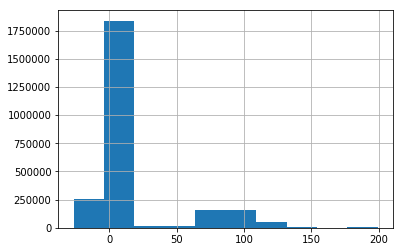

In [75]:
sub['scalar_coupling_constant'].hist()